(1000, 1200)


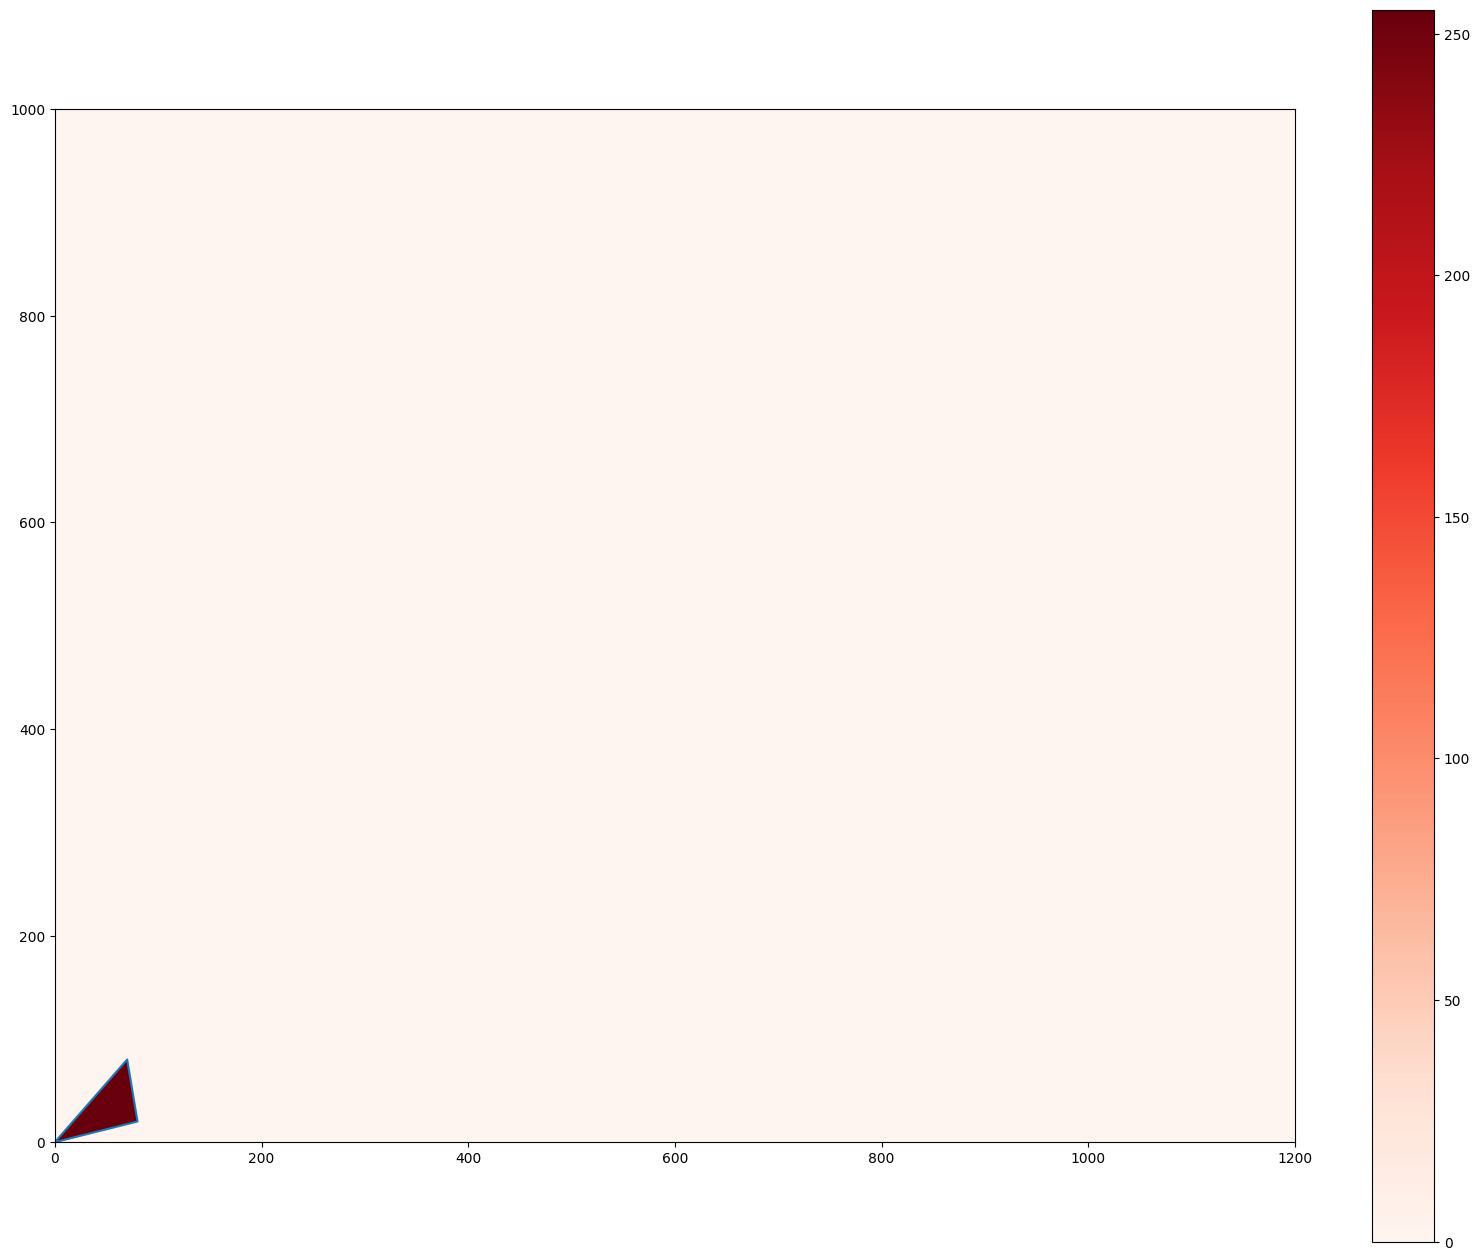

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


def inside_tri(triangel,X,Y):
    x1,y1,x2,y2,x3,y3 = triangel[:,[0,1]].flatten()

    P1 = (x2-x1)*(Y+0.5-y1)-(y2-y1)*(X+0.5-x1)
    P2 = (x3-x2)*(Y+0.5-y2)-(y3-y2)*(X+0.5-x2)
    P3 = (x1-x3)*(Y+0.5-y3)-(y1-y3)*(X+0.5-x3)

    B1 = (P1<=0) & (P2<=0) & (P3<=0)
    B2 = (P1>=0) & (P2>=0) & (P3>=0)
    boolMatrix = B1+B2

    return boolMatrix




if __name__=='__main__':
    NX,NY = 1200,1000
    tri = 10*np.array([[0,0,0],[8,2,0],[7,8,0]])
    X,Y = np.meshgrid(range(NX), range(NY))
    print(X.shape)

    #总像素矩阵
    Z = np.zeros(X.shape)

    #定义扫描窗口 AABB-BoundingBox
    xminp = max(int(tri[:,0].min())-1, 0)
    yminp = max(int(tri[:,1].min())-1, 0)
    xmaxp = min(int(tri[:,0].max())+1, NX)
    ymaxp = min(int(tri[:,1].max())+1, NY)
    Z1 = Z[yminp:ymaxp,xminp:xmaxp]
    X1 = X[yminp:ymaxp,xminp:xmaxp]
    Y1 = Y[yminp:ymaxp,xminp:xmaxp]

    Z1[inside_tri(tri,X1,Y1)] = 255

    plt.figure(figsize=(20,16))
    plt.imshow(Z, origin='lower', cmap=plt.cm.get_cmap('Reds'), vmin=0, vmax=255)
    plt.colorbar()
    plt.plot(tri[[0,1,2,0],0],tri[[0,1,2,0],1])
    plt.xlim(0, NX)
    plt.ylim(0, NY)
    plt.show()

In [5]:
import open3d_tutorial as o3dtut
import open3d as o3d
import scipy.io as io
from stl import mesh
data = mesh.Mesh.from_file('C:/Users/11573/Desktop/Matlab_files/Mytop3d_2.STL')
print(type(data))
voxel = o3d.geometry.VoxelGrid.create_from_triangle_mesh(data, voxel_size=0.05)
o3d.visualization.draw_geometries([voxel])

AttributeError: module 'open3d' has no attribute 'get_bunny_mesh'

(40, 40, 20)


{(0, 0, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf8181550>,
 (0, 0, 19): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf81b2a00>,
 (0, 1, 13): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf81b2dc0>,
 (0, 1, 19): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf83071c0>,
 (0, 2, 13): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf8307580>,
 (0, 2, 19): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf8307940>,
 (0, 3, 12): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf8307d00>,
 (0, 3, 18): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf8312100>,
 (0, 4, 12): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf83124c0>,
 (0, 4, 17): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf8312880>,
 (0, 35, 12): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf8312c40>,
 (0, 35, 17): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf8312f70>,
 (0, 36, 12): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2caf81b225

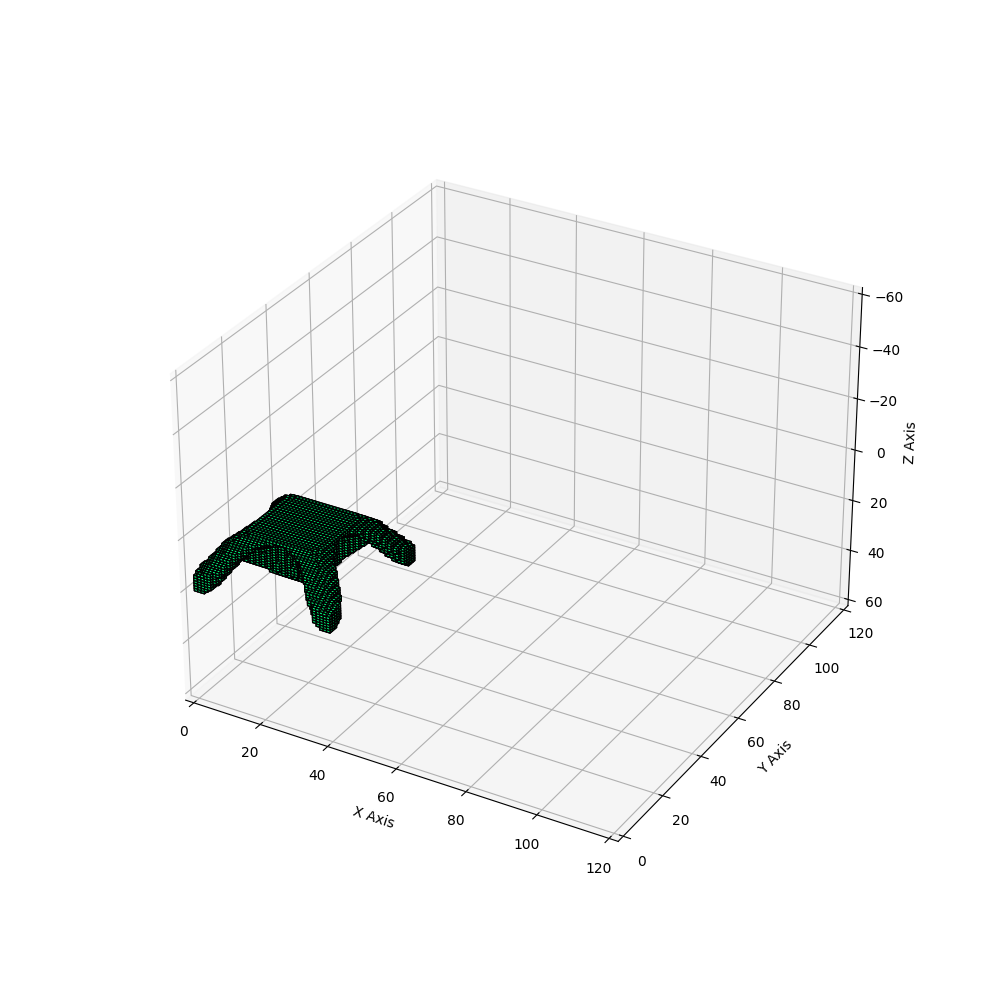

In [13]:
%matplotlib widget
import numpy as np
import scipy.io as io 
import matplotlib.pyplot as plt
data = io.loadmat('../../Matlab_files/top3d_wheel/top3d_wheel.mat')
data = data['ans']
data = np.array(data)
data = data.transpose(1, 2 ,0)
print(data.shape)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        for k in range(data.shape[2]):
            if data[i][j][k] > 0.5:
                data[i][j][k] = 1
            else:
                data[i][j][k] = 0
mycolormap = plt.get_cmap('winter')
data_max=data.max()
relativevalue=np.round(data/data_max,1)
colorsvalues=mycolormap(relativevalue)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)
ax.set_zlim(60 ,-60)
ax.voxels(data, facecolors=colorsvalues, edgecolor='k',shade=False)

In [ ]:
%matplotlib widget
label_data = np.zeros((120, 120, 120))
face_voxel = []
for i in range(data_new.shape[0]):
    for j in range(data_new.shape[1]):
        for k in range(data_new.shape[2]):
            if data_new[i][j][k] !=0:
                face_voxel.append(data_new[i-1][j][k])
                print('1:',face_voxel)
                face_voxel.append(data_new[i+1][j][k])
                print('2:',face_voxel)
                face_voxel.append(data_new[i][j-1][k])
                print('3:',face_voxel)
                face_voxel.append(data_new[i][j+1][k])
                print('4:',face_voxel)
                face_voxel.append(data_new[i][j][k-1])
                print('5:',face_voxel)
                face_voxel.append(data_new[i][j][k+1])
                print('6:',face_voxel)
                sum_value = sum(face_voxel)
                print('face_voxel:',face_voxel)

                if sum_value == 0 or sum_value == 1:
                    label_data[i-2:i+2,j-2:j+2,k-2:k+2] = data_new[i-2:i+2,j-2:j+2,k-2:k+2]
                face_voxel = []
# np.set_printoptions(threshold=np.inf)                
# print(label_data)
print(np.any(label_data))
print(np.nonzero(label_data))
mycolormap = plt.get_cmap('winter')
label_data_max = label_data.max()
relativevalue = np.round(label_data / label_data_max, 1)
colorsvalues = mycolormap(relativevalue)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(75, -75)
ax.voxels(label_data, facecolors=colorsvalues,edgecolors = 'k', shade = False)
np.save('../topodata(03.06)/top3d_cantilever_beam_50_label.npy',label_data)